In [26]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *

In [2]:
X, Y = load_Q1_dataset()

Xtrn = X[100:,:]; Ytrn = Y[100:] # training set
print(Xtrn.shape, Ytrn.shape)
Xtst = X[0:100,:]; Ytst = Y[0:100] # testing set

(700, 9) (700,)


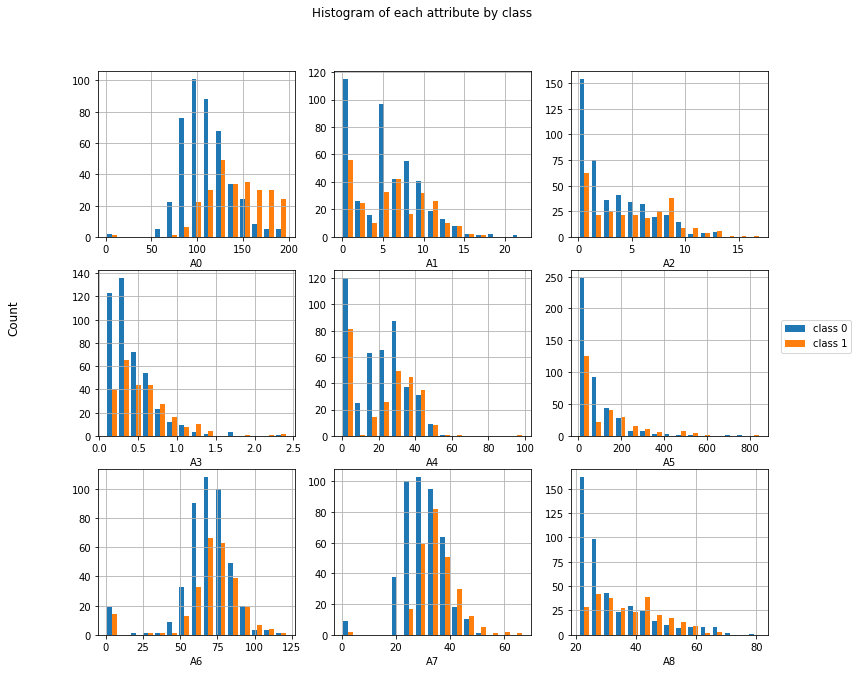

In [3]:
# Q1.1
def iaml212cw2_q1_1():
    Xa = Xtrn[np.where(Ytrn==0)[0]] #instances of class 0
    Xb = Xtrn[np.where(Ytrn==1)[0]] #instances of class 1

    fig, axs = plt.subplots(3, 3, figsize=(12,9)) #ploting 3 by 3 histogram
    axs = axs.ravel()

    for i in range(9):
        axs[i].hist([Xa[:,i], Xb[:,i]], bins=15)
        axs[i].set(xlabel=f"A{i}")

    for ax in axs.flat:
#         ax.set(ylabel='frequency')
        ax.grid()
        # ax.label_outer()
#     fig.tight_layout()
    fig.subplots_adjust(bottom=0.01)   ##  Need to play with this number.
    
    fig.legend(labels=['class 0', 'class 1'], loc="right")
#     plt.legend()
    fig.suptitle("Histogram of each attribute by class")
    fig.supylabel("Count")
    plt.savefig("results/1_1.png")
    plt.show()
iaml212cw2_q1_1()

In [4]:
# Q1.2
def iaml212cw2_q1_2():
    for i in range(9):
        print(np.corrcoef(Xtrn[:,i], Ytrn)[0][1])
iaml212cw2_q1_2()

0.4911758969080455
0.08740589845788758
0.2272871915395837
0.20736605298986868
0.1077203499769623
0.1856714007677248
0.07626074493410927
0.3044537676199445
0.24034733335192404


The unbiased sample variance of each attribute are [[1.47690983e+04 5.00000000e+00]
 [1.00643383e+03 0.00000000e+00]
 [3.84441702e+02 6.00000000e+00]
 [2.54105042e+02 4.00000000e+00]
 [1.39627696e+02 8.00000000e+00]
 [6.35046985e+01 7.00000000e+00]
 [1.67234273e+01 1.00000000e+00]
 [1.15959710e+01 2.00000000e+00]
 [1.05915369e-01 3.00000000e+00]]


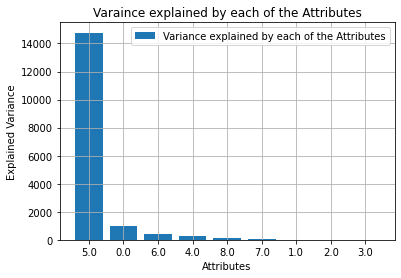

The sum of all the variances is 16645.63659972226
Cumulative explained variance ratio of each Attributes are 
 [0.         0.88726545 0.94772778 0.97082342 0.98608898 0.99447723
 0.99829233 0.999297   0.99999364 1.        ]


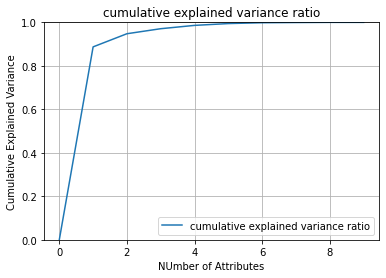

In [5]:
def iaml212cw2_q1_4():
    samVar = np.zeros((9,2)) #initialising numpy array to store the unbiased smaple variance
    # print(samVar)
    for i in range(9):
        #computing unbiased sample variance of each attribute
        vari = np.array([np.var(Xtrn[:,i], axis=0, ddof=1),str(i)])
        samVar[i]=vari
    samVar = samVar[samVar[:,0].argsort()[::-1]] #sorting in descending order
#     print(samVar)
    print(f"The unbiased sample variance of each attribute are {samVar}")
    # print(samVar[:,0])

    #Q1.4.1 plot
#     plt.plot(samVar[:,0], label="Varaince explained by each of the Attributes")
    plt.bar(range(len(samVar[:,0])), samVar[:,0], label="Variance explained by each of the Attributes")
    plt.title("Varaince explained by each of the Attributes")
    plt.xlabel("Attributes")
    plt.ylabel("Explained Variance")
    plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_1.png")
    plt.show()

    summ = samVar.sum(axis=0)[0]
#     summ.append([0,0])
    print(f"The sum of all the variances is {summ}")
    cumsamVar = np.cumsum(samVar[:,0]/summ,)
    cumsamVar = np.append(0,cumsamVar)
#     cumsamVar = cumsamVar - cumsamVar[0]
    print(f"Cumulative explained variance ratio of each Attributes are \n {cumsamVar}")
    #Q1.4.2 plot
    plt.plot(cumsamVar, label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("NUmber of Attributes")
    plt.ylabel("Cumulative Explained Variance")
    plt.ylim(0,1)
#     plt.xticks(np.arange(10), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_2.png")
    plt.show()

iaml212cw2_q1_4() 

The total amount of variance is 16645.636599722264


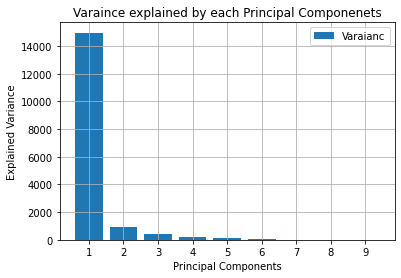

cumsumVar is [0.89934746 0.95338182 0.97716884 0.98891039 0.99575502 0.9985324
 0.99952546 0.99999406 1.        ]


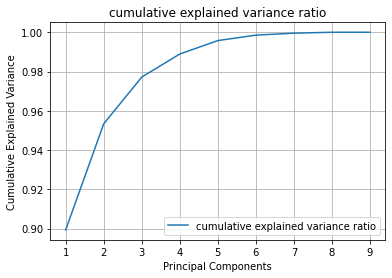

In [6]:
# # Q1.5
def iaml212cw2_q1_5():
    pca = PCA().fit(Xtrn)
#     print(pca.explained_variance_)
    # print(pca)
    # print(pca.explained_variance_)
    # print(np.cumsum(pca.explained_variance_ratio_))
    print(f"The total amount of variance is {sum(pca.explained_variance_)}")

#     plt.plot(pca.explained_variance_, label="Varaince explained by each Principal Components")
    plt.bar(range(1,10), pca.explained_variance_, label="Varaianc")
    plt.title("Varaince explained by each Principal Componenets")
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
    plt.xticks(np.arange(1,10))
    plt.legend()
    
    plt.grid()
    plt.savefig("results/1_5_1.png")
    plt.show()
    
    
    print(f"cumsumVar is {np.cumsum(pca.explained_variance_ratio_)}")
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xticks(np.arange(0,9),[1,2,3,4,5,6,7,8,9])
    plt.legend()
    plt.grid()
#     plt.ylim(0,1)
    plt.savefig("results/1_5_2.png")
    plt.show()
iaml212cw2_q1_5()   # comment this out when you run the function

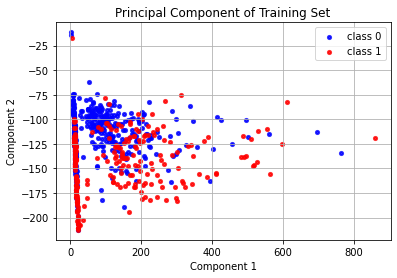

In [7]:
pca = PCA()
# Xtrn_m = Xtrn - Xtrn.mean(axis=0)
x2d = pca.fit(Xtrn)
compo = x2d.components_[0:2]
colours = ['b','r']

classes = [0,1]
newx = np.dot(Xtrn, compo.T)
for colour, target_name in zip(colours, classes):
    plt.scatter(newx[Ytrn==target_name, 0], newx[Ytrn==target_name, 1], color=colour, alpha=.8, s=10, 
                lw=2, label=f"class {target_name}")
    
plt.grid()
plt.legend()
plt.title("Principal Component of Training Set")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [8]:
for i in range(9):
    print(np.corrcoef(Xtrn[:,i], newx[:,0])[0][1], np.corrcoef(Xtrn[:,i], newx[:,1])[0][1])    

0.3855930142069001 -0.9142889454225336
-0.045825160822251125 -0.09077312003733048
-0.05705150513641671 -0.225462634782291
0.18579338880949564 -0.07987177012105033
0.4592402183572784 0.09716456539322534
0.9996780135176881 0.024084687085466964
0.10057182197062053 -0.25539200876602997
0.23230210476652122 -0.17260644028984354
-0.0015740705358918538 -0.3734437688312689


In [9]:
# pca = PCA(2)
# x2d = pca.fit_transform(Xtrn)
# colours = ['b','r']
# sub_cats = [0,1]
# lw=2
# for colour, target_name in zip(colours, sub_cats):
#     plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=colour, alpha=.8, lw=lw,
#                 label=target_name, s=10) 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

The total amount of variance is 9.012875536480687


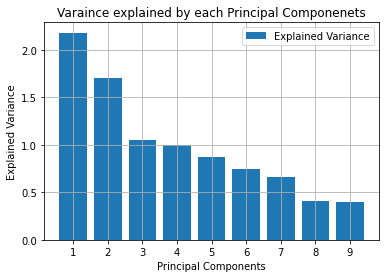

cumsumVar is [0.24182043 0.43127363 0.54780999 0.65897336 0.75568541 0.83802208
 0.91096518 0.95642135 1.        ]


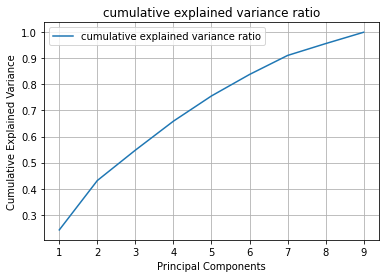

In [11]:
    pca = PCA().fit(Xtrn_s)
    print(f"The total amount of variance is {sum(pca.explained_variance_)}")

#     plt.plot(pca.explained_variance_, label="Varaince explained by each Principal Components")
    plt.bar(range(1,10), pca.explained_variance_, label="Explained Variance")
    plt.title("Varaince explained by each Principal Componenets")
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
    plt.xticks(np.arange(1,10))
    plt.legend()
    plt.grid()
#     plt.savefig("results/1_5_1.png")
    plt.show()

    print(f"cumsumVar is {np.cumsum(pca.explained_variance_ratio_)}")
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xticks(np.arange(9), [1,2,3,4,5,6,7,8,9])
    plt.legend()
    plt.grid()
#     plt.ylim(0,1)
#     plt.savefig("results/1_5_2.png")
    plt.show()

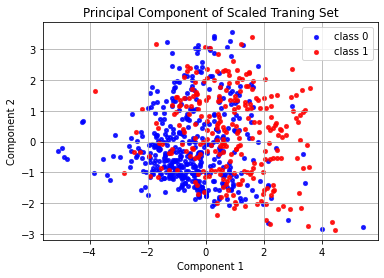

In [12]:
Xtrn_sm = Xtrn_s - Xtrn_s.mean(axis=0)
pca = PCA()
x2d = pca.fit(Xtrn_s)
print(f"")
compo = x2d.components_[0:2] #PCA Components 
colours = ['b','r']
newx_s = np.dot(Xtrn_s, compo.T)
classes = [0,1]
for colour, target_name in zip(colours, classes):
    plt.scatter(newx_s[Ytrn==target_name, 0], newx_s[Ytrn==target_name, 1], c = colour, alpha=.8, lw=2,
                label=f"class {target_name}", s=10)
plt.title("Principal Component of Scaled Traning Set")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid()
plt.show()


In [13]:
for i in range(9):
    print(np.corrcoef(Xtrn_s[:,i], newx_s[:,0])[0][1], np.corrcoef(Xtrn_s[:,i], newx_s[:,1])[0][1])

0.6006713897085358 0.1774322516435997
0.05729590985040152 0.10003686429568931
0.2679520322312 0.7599827142218684
0.3656554651376429 -0.207643371530096
0.6230382061060183 -0.46599042048329115
0.6298568548408795 -0.36979586693725947
0.5228507215944561 0.2242280865429318
0.6511607443951045 -0.16844950994503738
0.35286443238025417 0.7812491257116686


In [14]:
# pca = PCA(2)
# x2d = pca.fit_transform(Xtrn_s)
# colours = ['b','r']
# sub_cats = [0,1]
# lw=2
# for color, target_name in zip(colours, sub_cats):
#     plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name, s=10 ) 

In [15]:
grid = {"C":np.logspace(-2,2,13)}
cv = StratifiedKFold(n_splits=5, shuffle=False)
result = GridSearchCV(SVC(), grid, cv=cv, return_train_score= True)
result.fit(Xtrn_s, Ytrn)

print("tuned hpyerparameters :(best parameters) ",result.best_params_)
print("accuracy :",result.best_score_)
means_test = result.cv_results_['mean_test_score']
stds_test = result.cv_results_['std_test_score']
means_train = result.cv_results_['mean_train_score']
stds_train = result.cv_results_['std_train_score']
params = result.cv_results_['params']
print('mean, std for training set')
for mean, stdev, param in zip(means_train, stds_train, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('mean, std for validation set')
for mean, stdev, param in zip(means_test, stds_test, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


tuned hpyerparameters :(best parameters)  {'C': 0.46415888336127775}
accuracy : 0.7742857142857142
mean, std for training set
0.625714 (0.000875) with: {'C': 0.01}
0.625714 (0.000875) with: {'C': 0.021544346900318832}
0.655000 (0.010314) with: {'C': 0.046415888336127774}
0.786071 (0.014348) with: {'C': 0.1}
0.802143 (0.013712) with: {'C': 0.21544346900318834}
0.819643 (0.013878) with: {'C': 0.46415888336127775}
0.842143 (0.009949) with: {'C': 1.0}
0.866429 (0.007857) with: {'C': 2.154434690031882}
0.892143 (0.004601) with: {'C': 4.6415888336127775}
0.918929 (0.006643) with: {'C': 10.0}
0.941786 (0.007542) with: {'C': 21.54434690031882}
0.970357 (0.005825) with: {'C': 46.41588833612777}
0.983929 (0.002988) with: {'C': 100.0}
mean, std for validation set
0.625714 (0.003499) with: {'C': 0.01}
0.625714 (0.003499) with: {'C': 0.021544346900318832}
0.642857 (0.010102) with: {'C': 0.046415888336127774}
0.748571 (0.034523) with: {'C': 0.1}
0.760000 (0.032135) with: {'C': 0.21544346900318834}
0

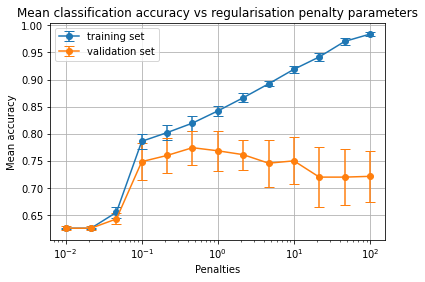

In [16]:
# cvals = [str(i) for i in np.logspace(-2,2,13)]

# plt.plot(np.logspace(-2,2,13), means_test, 'o-', label="validation set")
# plt.plot(np.logspace(-2,2,13), means_train, 'v-', label="training set")
plt.errorbar(np.logspace(-2,2,13), means_train, stds_train, label="training set", capsize=5, fmt ='o-')
plt.errorbar(np.logspace(-2,2,13), means_test, stds_test, label="validation set", capsize=5, fmt ='o-')
plt.xscale('log')
plt.title("Mean classification accuracy vs regularisation penalty parameters")
plt.xlabel("Penalties")
plt.ylabel("Mean accuracy")
plt.grid()
plt.legend()
plt.savefig("results/1.8.png")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

In [18]:
result.best_params_["C"]

0.46415888336127775

In [19]:
svm = SVC(kernel="rbf", C=0.46415888336127775)
model = svm.fit(Xtrn_s, Ytrn)
modelpre = model.predict(Xtst_s)
cm = confusion_matrix(Ytst, modelpre)
print(cm)
print(f"number of instances correctly classified : {cm[0,0]+cm[1,1]}")

[[51 11]
 [14 24]]
number of instances correctly classified : 75


In [20]:
xxtrn = Xtrn[Ytrn==0]
Ztrn = xxtrn[xxtrn[:,4]>=1]
Ztrn = Ztrn[:,[4,7]]

In [21]:
print(np.mean(Ztrn, axis=0))
mean = Ztrn.mean(axis=0)
print(np.cov(Ztrn[:,0], Ztrn[:,1], ddof=1))
# covmat = np.cov(Ztrn, ddof=1)
covmat = np.cov(Ztrn[:,0], Ztrn[:,1], ddof=1)

[27.0209434  31.09320755]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


In [22]:
# x,y = np.meshgrid(Ztrn[:,0], Ztrn[:,1])
# pos = np.dstack((x,y))
# # print(pos)
# rv = scipy.stats.multivariate_normal(mean, covmat)
# # print(rv)
# rr = np.random.multivariate_normal(mean, covmat)

# print(rr)
# z = rv.pdf(pos)
# print(z.shape)
# plt.scatter(Ztrn[:,0], Ztrn[:,1])
# contours = plt.contour(Ztrn[:,0], Ztrn[:,1],z, 5)
# plt.clabel(contours, inline=True, fontsize=8)

# plt.imshow(Ztrn, extent=[0, 55, 0, 55], origin='lower', alpha=0.5)
# plt.colorbar()
# plt.grid()

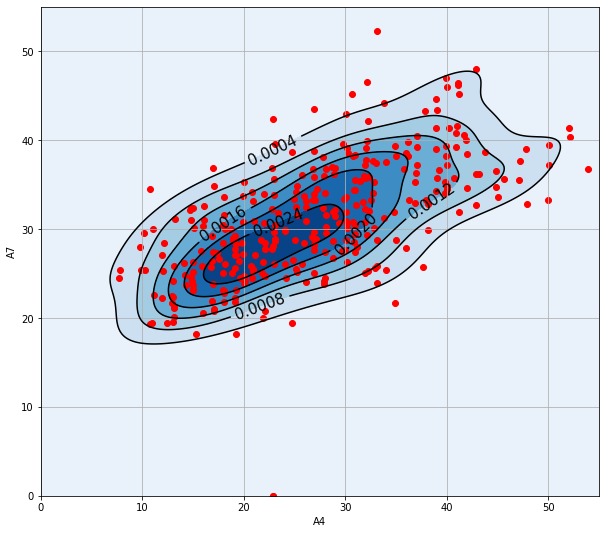

In [23]:
rr = np.random.multivariate_normal(mean, covmat, 5000)
x = Ztrn[:,0]
y = Ztrn[:, 1]
xmin, xmax = 0, 55
ymin, ymax = 0, 55

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:318j, ymin:ymax:318j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = scipy.stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(10,9))
ax = fig.gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=15)
ax.scatter(x,y, color="red")
ax.set_xlabel('A4')
ax.set_ylabel('A7')
ax.grid()

plt.show()

[27.0209434  31.09320755]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


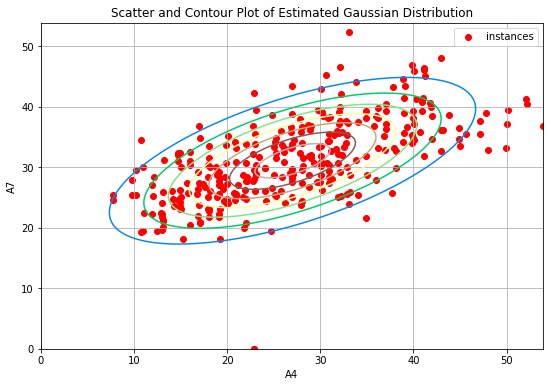

In [24]:
    xxtrn = Xtrn[Ytrn==0]
    Ztrn = xxtrn[xxtrn[:,4]>=1]
    Ztrn = Ztrn[:,[4,7]]

    # Q1.9 a)
    #computing the mean vector and covariance matrix
    mean = Ztrn.mean(axis=0)
    covmat = np.cov(Ztrn[:,0], Ztrn[:,1],ddof=1)
    print(mean)
    print(covmat)

    #Q1.9 b)
    minx = np.min(Ztrn[:,0])
    maxx = np.max(Ztrn[:,0])
    miny = np.min(Ztrn[:,1])
    maxy = np.max(Ztrn[:,1])

    n = 318
    x = np.linspace(miny, maxx, n)
    y = np.linspace(miny, maxx, n)

    x,y = np.meshgrid(x,y)
    pos = np.dstack((x,y))
    rv = scipy.stats.multivariate_normal(mean, covmat)
    z = rv.pdf(pos)
    plt.figure(figsize=(9,6))
    plt.contour(x,y,z, cmap="terrain")
    plt.scatter(Ztrn[:,0], Ztrn[:,1], color='r', label="instances")

    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.title("Scatter and Contour Plot of Estimated Gaussian Distribution")
    plt.grid()
    plt.legend()
    plt.savefig("results/1_9.png")
    plt.show()

[27.0209434  31.09320755]
The mean vector is: [27.0209434  31.09320755]
The covariance matrix is:
[[94.84194889  0.        ]
 [ 0.         46.54658163]]


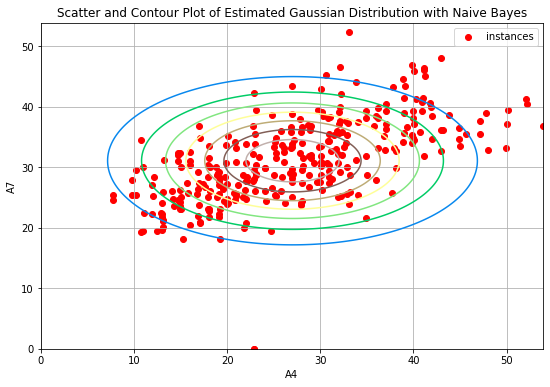

In [27]:
    xxtrn = Xtrn[Ytrn==0]
    Ztrn = xxtrn[xxtrn[:,4]>=1]
    Ztrn = Ztrn[:,[4,7]]

    gnb = GaussianNB()
    gnb.fit(Ztrn, np.zeros(318))
    print(gnb.theta_[0])
    meannb = gnb.theta_[0]
    print(f"The mean vector is: {meannb}")
    # ztrn_cov_nb = np.diag(gnb.sigma_[0]*(len(Ztrn)-1)/len(Ztrn))
    covnb = np.diag(gnb.sigma_[0])
    print(f"The covariance matrix is:\n{covnb}")

    minx = np.min(Ztrn[:,0])
    maxx = np.max(Ztrn[:,0])
    miny = np.min(Ztrn[:,1])
    maxy = np.max(Ztrn[:,1])

    n = 318
    x = np.linspace(miny, maxx, n)
    y = np.linspace(miny, maxx, n)
    x,y = np.meshgrid(x,y)
    pos = np.dstack((x,y))
    rv = scipy.stats.multivariate_normal(meannb, covnb)
    z = rv.pdf(pos)
    plt.figure(figsize=(9,6))
    plt.contour(x, y, z, cmap="terrain")
    plt.scatter(Ztrn[:,0], Ztrn[:,1], color='r', label='instances')
    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.title("Scatter and Contour Plot of Estimated Gaussian Distribution with Naive Bayes")
    plt.grid()
    plt.legend()
    plt.savefig("results/1_10.png")
    plt.show()